# Traces synchronization and frequential spectrum

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
blue = '#1f77b4'

In [63]:
# graph style
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
matplotlib.rc('legend', fontsize=15)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
fig_height = 6
fig_width = 9

In [64]:
sources = ('em','pw')
devices = ('F0','F1','F2','F4')

In [93]:
# HDF5
# from / to 
fake_path_format = "/mnt/SCA1/CARDIS/script/fake_data/fake_08B{}+08B{}.h5"
def load_and_plot_h5(domainA,domainB,plot_func):
    file_in = h5py.File(fake_path_format.format(domainA.upper(),domainB.upper()),'r')
    t_dataset = file_in['FAKE/traces_08B{}'.format(domainA.upper())]
    plot_func(t_dataset)
    file_in.close()

In [81]:
# NUMPY
# device / source 
trace_path_format = '/mnt/SCA1/CARDIS/data_gan/stm32/translate/data/08B{}/SNR4/700/minmax/X_attack.npy'
def load_and_plot_npy(domainA,domainB,plot_func):
    t_dataset = np.load(trace_path_format.format(domainA.upper()))
    plot_func(t_dataset)

## Synchronization

In [102]:
def plot_curves_and_mean(domainA,domainB,archi,load_func):
    fig = plt.figure()
    ax = plt.gca()
    ax.set_ylim(-1,1)
    #ax.set_title('STM32 {} ({})'.format(device,source))
    
    def plotting(t_dataset):
        for i in (5,):
            ax.plot(t_dataset[i],linestyle=':',color=blue,label='single trace')
        ax.plot(np.mean(t_dataset,0),linestyle='-',color=blue,label='mean trace')
        ax.legend(loc='lower right')
        ax.set_xlabel('sample points')
        #ax.set_ylabel('')
    
    load_func(domainA,domainB,plotting)
    if domainB is None:
        outfilename = '../figures/mean_plot_{}_{}.png'.format(archi,domainA.upper())
    else:
        outfilename = '../figures/mean_plot_{}_{}_{}.png'.format(archi,domainA.upper(),domainB.upper())
    plt.savefig(outfilename,bbox_inches='tight')
    #plt.show()

In [132]:
def plot_mean(domainA,domainB,archi,load_func):
    fig = plt.figure()
    ax = plt.gca()
    ax.set_ylim(-1,1)
    #ax.set_title('STM32 {} ({})'.format(device,source))
    
    def plotting(t_dataset):
        #for i in (5,):
        #    ax.plot(t_dataset[i],linestyle=':',color=blue,label='single trace')
        ax.plot(np.mean(t_dataset,0),linestyle='-',color=blue,label='mean trace')
        #ax.legend(loc='lower right')
        ax.set_xlabel('sample points')
        #ax.set_ylabel('')
    
    load_func(domainA,domainB,plotting)
    if domainB is None:
        outfilename = '../figures/mean_plot_{}_{}.png'.format(archi,domainA.upper())
    else:
        outfilename = '../figures/mean_plot_{}_{}_{}.png'.format(archi,domainA.upper(),domainB.upper())
    plt.savefig(outfilename,bbox_inches='tight')
    #plt.show()

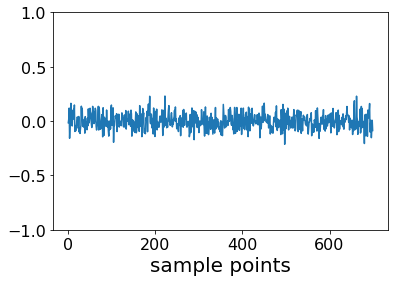

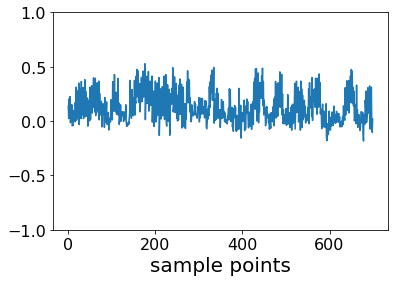

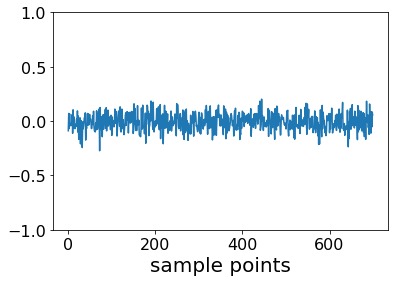

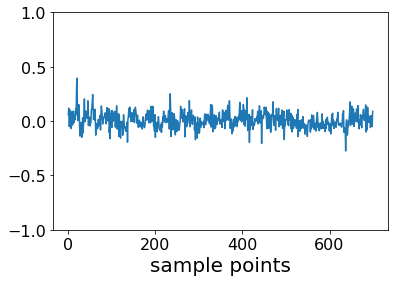

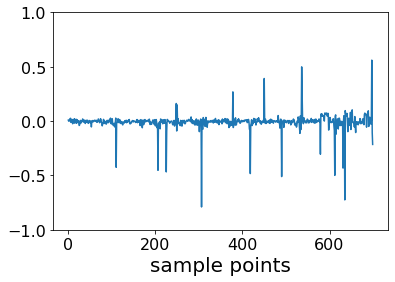

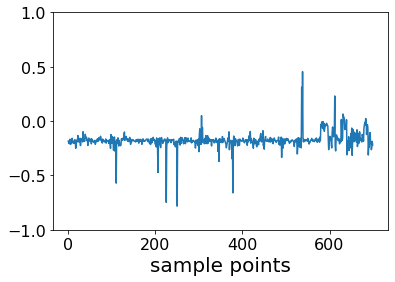

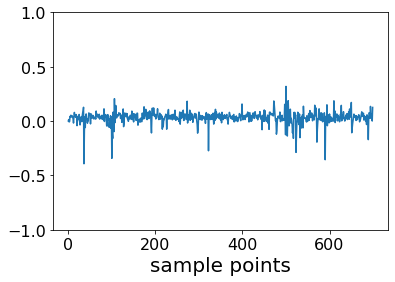

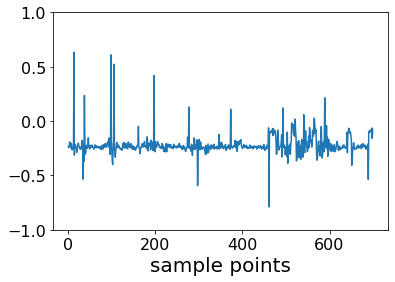

In [133]:
for device in devices:
    for source in sources:
        plot_mean(device+source,None,'segan',load_and_plot_npy)

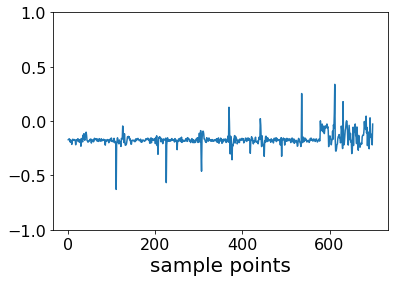

In [134]:
plot_mean('f2em','f2pw','segan',load_and_plot_h5)

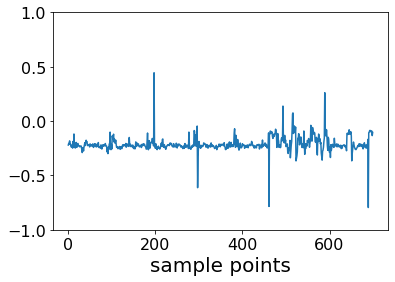

In [135]:
plot_mean('f4em','f4pw','segan',load_and_plot_h5)